In [2]:
import pandas as pd

In [3]:
city_day = pd.read_csv('city_day.csv')

In [4]:
city_day.shape

(29531, 16)

In [5]:
#station_day = pd.read_csv('station_day.csv')

In [6]:
# station_day.shape

In [7]:
# station_hour = pd.read_csv('station_hour.csv', low_memory = False)

In [8]:
# station_hour.shape

In [9]:
city_day.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
# station_day.head(5)

In [11]:
# station_hour.head(5)

In [12]:
city_day = city_day.drop(['Date', 'AQI_Bucket', 'Xylene'], axis = 1)

In [13]:
# from sklearn.preprocessing import LabelEncoder

In [14]:
# le = LabelEncoder()

In [15]:
# city_day['City_encoded'] = le.fit_transform(city_day['City'])

In [16]:
cd = city_day.drop_duplicates().dropna()
cd.shape

(10654, 13)

In [17]:
cd.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
2010,Aizawl,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.0
2011,Aizawl,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.0
2012,Aizawl,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.0
2013,Aizawl,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.0
2014,Aizawl,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.0


In [18]:
from sklearn.preprocessing import MaxAbsScaler

In [19]:
scaler = MaxAbsScaler()

In [20]:
numerical_cols = cd.select_dtypes(include=['float64', 'int64']).columns.tolist()
cd[numerical_cols] = scaler.fit_transform(cd[numerical_cols])

In [21]:
X = cd.drop(['AQI', 'City'], axis = 1)
Y = cd['AQI']

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.1, random_state = 42)

In [24]:
x_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
28936,0.083489,0.136043,0.014885,0.113785,0.042648,0.044945,0.023982,0.063134,0.395103,0.008219,0.013389
19528,0.020354,0.038048,0.031534,0.094277,0.075776,0.055566,0.014455,0.029688,0.080472,0.054172,0.017105
2609,0.030028,0.065041,0.013980,0.061108,0.026851,0.027807,0.016097,0.130026,0.085167,0.002637,0.006749
17347,0.060990,0.115149,0.027553,0.098646,0.069601,0.056484,0.017411,0.131905,0.127886,0.000286,0.007299
9634,0.078324,0.111799,0.024205,0.081785,0.058171,1.000000,0.018068,0.090317,0.131805,0.000044,0.000198
...,...,...,...,...,...,...,...,...,...,...,...
14929,0.052775,0.095171,0.031579,0.076554,0.061174,0.050497,0.030880,0.105850,0.105692,0.002527,0.013433
11901,0.044094,0.096213,0.046283,0.162769,0.085227,0.163126,0.030552,0.109984,0.121251,0.003626,0.041134
12100,0.121206,0.219330,0.082161,0.274277,0.141726,0.156802,0.029895,0.220343,0.163776,0.006439,0.038738
3069,0.024294,0.035777,0.006470,0.051200,0.019072,0.047166,0.021682,0.136039,0.144880,0.000220,0.000945


In [25]:
y_train

28936    0.194134
19528    0.054469
2609     0.074022
17347    0.134078
9634     0.149441
           ...   
14929    0.136872
11901    0.125698
12100    0.243017
3069     0.068436
16705    0.340782
Name: AQI, Length: 9588, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import catboost

In [27]:
rf = RandomForestRegressor(random_state = 42)

In [28]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_rf = rf.predict(x_test)

In [30]:
svr = SVR()

In [31]:
svr.fit(x_train, y_train)

SVR()

In [32]:
y_pred_svr = svr.predict(x_test)

In [33]:
cb = catboost.CatBoostRegressor()

In [34]:
cb.fit(x_test, y_test)

Learning rate set to 0.041359
0:	learn: 0.1266363	total: 178ms	remaining: 2m 57s
1:	learn: 0.1225047	total: 180ms	remaining: 1m 29s
2:	learn: 0.1188751	total: 182ms	remaining: 1m
3:	learn: 0.1152033	total: 184ms	remaining: 45.9s
4:	learn: 0.1118900	total: 187ms	remaining: 37.1s
5:	learn: 0.1084620	total: 190ms	remaining: 31.5s
6:	learn: 0.1050820	total: 193ms	remaining: 27.4s
7:	learn: 0.1021088	total: 195ms	remaining: 24.2s
8:	learn: 0.0993272	total: 197ms	remaining: 21.7s
9:	learn: 0.0964245	total: 200ms	remaining: 19.8s
10:	learn: 0.0938159	total: 202ms	remaining: 18.2s
11:	learn: 0.0912006	total: 205ms	remaining: 16.9s
12:	learn: 0.0886316	total: 207ms	remaining: 15.7s
13:	learn: 0.0861989	total: 210ms	remaining: 14.8s
14:	learn: 0.0836959	total: 212ms	remaining: 13.9s
15:	learn: 0.0813593	total: 214ms	remaining: 13.2s
16:	learn: 0.0792613	total: 217ms	remaining: 12.6s
17:	learn: 0.0771485	total: 219ms	remaining: 12s
18:	learn: 0.0749995	total: 222ms	remaining: 11.4s
19:	learn: 0.0

In [35]:
y_pred_cb = cb.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Random forest metrics

In [37]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
msle_rf = mean_squared_log_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5

In [38]:
print('MSE = ', mse_rf)
print('MAE = ', mae_rf)
print('r2 = ', r2_rf)
print('MSLE = ', msle_rf)
print('RMSE = ', rmse_rf)

MSE =  0.0009345140770549433
MAE =  0.0196669138532812
r2 =  0.9453632435011787
MSLE =  0.0005706084970131954
RMSE =  0.030569822980431916


Custom MAE

In [39]:
temp = 0.0
for x, xi in zip(y_test, y_pred_rf):
    temp = temp + abs(x - xi)

temp = temp / y_test.shape[0]
print(temp)

0.019666913853281225


# SVR metrics

In [40]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
msle_svr = mean_squared_log_error(y_test, y_pred_svr)
rmse_svr = mse_svr**0.5

print('MSE = ', mse_svr)
print('MAE = ', mae_svr)
print('r2 = ', r2_svr)
print('MSLE = ', msle_svr)
print('RMSE = ', rmse_svr)

MSE =  0.0026472965795640373
MAE =  0.04437214328235113
r2 =  0.845224697894734
MSLE =  0.0018435003193038677
RMSE =  0.05145188606420602


# CatBoost metrics

In [41]:
mse_cb = mean_squared_error(y_test, y_pred_cb)
mae_cb = mean_absolute_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)
msle_cb = mean_squared_log_error(y_test, y_pred_cb)
rmse_cb = mse_cb**0.5

print('MSE = ', mse_cb)
print('MAE = ', mae_cb)
print('r2 = ', r2_cb)
print('MSLE = ', msle_cb)
print('RMSE = ', rmse_cb)

MSE =  8.4546258088794e-05
MAE =  0.007125515754799759
r2 =  0.9950569676482119
MSLE =  5.931204893774605e-05
RMSE =  0.00919490391949769


In [42]:
import matplotlib.pyplot as plt
import numpy as np

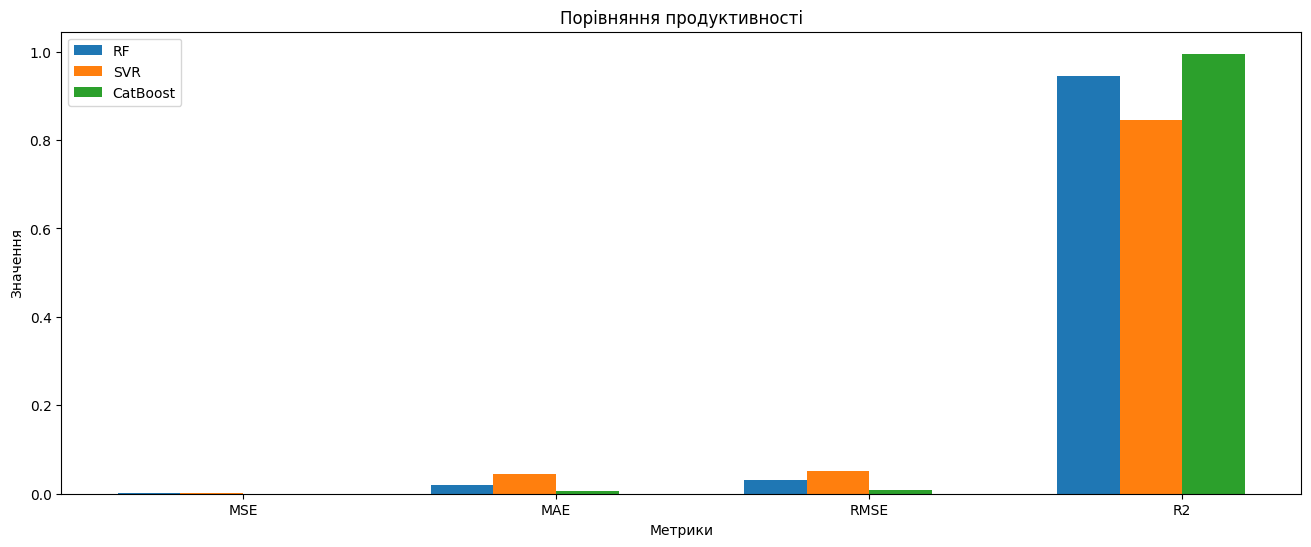

In [43]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['RF', 'SVR', 'CatBoost']
metric_names = ['MSE', 'MAE', 'RMSE', 'R2']
metrics = [
    [mse_rf, mae_rf, rmse_rf, r2_rf],
    [mse_svr, mae_svr, rmse_svr, r2_svr],
    [mse_cb, mae_cb, rmse_cb, r2_cb]
]

x = np.arange(len(metric_names))  # Змінено з model_names на metric_names

width = 0.2

plt.figure(figsize=(16, 6))

for i, metric_values in enumerate(metrics):
    plt.bar(x + i*width, metric_values, width, label=f'{model_names[i]}')

plt.xlabel('Метрики')  # Змінено з 'Metrics' на 'Метрики'
plt.ylabel('Значення')  # Змінено з 'Values' на 'Значення'
plt.title('Порівняння продуктивності')  # Змінено з 'Performance Comparison' на 'Порівняння продуктивності'
plt.xticks(x + width*(len(model_names)/2), metric_names)
plt.legend()
plt.show()


In [44]:
cd.shape
cd.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
2010,Aizawl,0.045538,0.048514,0.032575,0.007815,0.036336,0.123733,0.018397,0.052862,0.010903,0.000022,0.000176,0.072626
2011,Aizawl,0.056014,0.058578,0.032530,0.005600,0.035380,0.140774,0.018725,0.055869,0.000698,0.000000,0.000000,0.083799
2012,Aizawl,0.063076,0.063786,0.032303,0.006585,0.035756,0.139761,0.018725,0.056746,0.001591,0.000000,0.000000,0.086592
2013,Aizawl,0.049346,0.051488,0.032077,0.002215,0.033197,0.137154,0.015769,0.057998,0.001164,0.000000,0.000000,0.097765
2014,Aizawl,0.039600,0.043971,0.025472,0.014277,0.027602,0.115767,0.016426,0.059000,0.050518,0.000286,0.001495,0.075419


In [45]:
four_cities = ['Delhi', 'Bengaluru', 'Kolkata', 'Hyderabad']

In [46]:
fc = cd[cd['City'].isin(four_cities)]

In [47]:
fc.shape

(5611, 13)

In [48]:
fc

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
4604,Bengaluru,0.045874,0.088420,0.013709,0.097538,0.035039,0.133871,0.040079,0.024302,0.069763,0.005296,0.039222,0.083799
4607,Bengaluru,0.018428,0.054764,0.006605,0.041908,0.016206,0.060973,0.048620,0.025680,0.161642,0.002461,0.004551,0.071229
4610,Bengaluru,0.041175,0.192375,0.026241,0.132308,0.074309,0.134160,0.068660,0.033697,0.133163,0.004571,0.009893,0.085196
4611,Bengaluru,0.061894,0.196818,0.032801,0.184246,0.108427,0.105919,0.051248,0.027934,0.121639,0.004000,0.010223,0.181564
4616,Bengaluru,0.032085,0.050020,0.032032,0.101169,0.066564,0.202568,0.056833,0.036954,0.038723,0.003340,0.005232,0.143855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,Kolkata,0.011512,0.031034,0.023707,0.056923,0.049539,0.040504,0.011498,0.071778,0.089784,0.003692,0.024865,0.051676
19842,Kolkata,0.015437,0.032075,0.026874,0.077723,0.063528,0.033407,0.012484,0.074158,0.107710,0.002901,0.024338,0.060056
19843,Kolkata,0.021201,0.040659,0.024522,0.098338,0.073183,0.036642,0.014783,0.087812,0.118884,0.006989,0.021502,0.067039
19844,Kolkata,0.020427,0.044988,0.028277,0.075631,0.061822,0.046539,0.012155,0.070901,0.095410,0.005406,0.023634,0.065642


In [49]:
class_counts = fc['City'].value_counts()

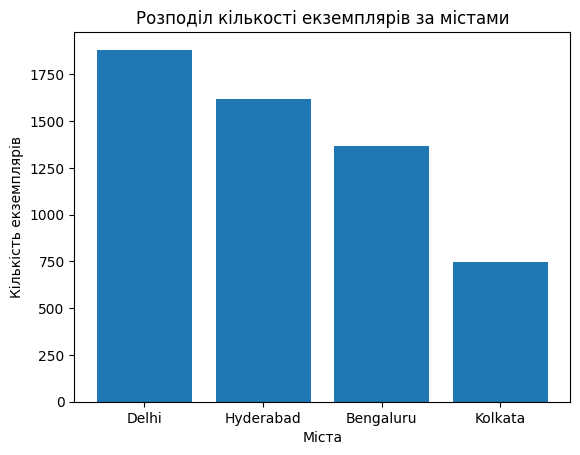

In [50]:
plt.bar(class_counts.index, class_counts.values)

plt.title('Розподіл кількості екземплярів за містами')
plt.xlabel('Міста')
plt.ylabel('Кількість екземплярів')
plt.show()


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
sm = SMOTE(random_state=42)

In [53]:
X_fc = fc.drop(['City'], axis = 1)
Y_fc = fc['City']

In [54]:
X_fc

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
4604,0.045874,0.088420,0.013709,0.097538,0.035039,0.133871,0.040079,0.024302,0.069763,0.005296,0.039222,0.083799
4607,0.018428,0.054764,0.006605,0.041908,0.016206,0.060973,0.048620,0.025680,0.161642,0.002461,0.004551,0.071229
4610,0.041175,0.192375,0.026241,0.132308,0.074309,0.134160,0.068660,0.033697,0.133163,0.004571,0.009893,0.085196
4611,0.061894,0.196818,0.032801,0.184246,0.108427,0.105919,0.051248,0.027934,0.121639,0.004000,0.010223,0.181564
4616,0.032085,0.050020,0.032032,0.101169,0.066564,0.202568,0.056833,0.036954,0.038723,0.003340,0.005232,0.143855
...,...,...,...,...,...,...,...,...,...,...,...,...
19841,0.011512,0.031034,0.023707,0.056923,0.049539,0.040504,0.011498,0.071778,0.089784,0.003692,0.024865,0.051676
19842,0.015437,0.032075,0.026874,0.077723,0.063528,0.033407,0.012484,0.074158,0.107710,0.002901,0.024338,0.060056
19843,0.021201,0.040659,0.024522,0.098338,0.073183,0.036642,0.014783,0.087812,0.118884,0.006989,0.021502,0.067039
19844,0.020427,0.044988,0.028277,0.075631,0.061822,0.046539,0.012155,0.070901,0.095410,0.005406,0.023634,0.065642


In [55]:
x_res, y_res = sm.fit_resample(X_fc, Y_fc)

In [60]:
x_res

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.045874,0.088420,0.013709,0.097538,0.035039,0.133871,0.040079,0.024302,0.069763,0.005296,0.039222,0.083799
1,0.018428,0.054764,0.006605,0.041908,0.016206,0.060973,0.048620,0.025680,0.161642,0.002461,0.004551,0.071229
2,0.041175,0.192375,0.026241,0.132308,0.074309,0.134160,0.068660,0.033697,0.133163,0.004571,0.009893,0.085196
3,0.061894,0.196818,0.032801,0.184246,0.108427,0.105919,0.051248,0.027934,0.121639,0.004000,0.010223,0.181564
4,0.032085,0.050020,0.032032,0.101169,0.066564,0.202568,0.056833,0.036954,0.038723,0.003340,0.005232,0.143855
...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.103257,0.152761,0.046102,0.258384,0.178146,0.092131,0.034715,0.193780,0.221928,0.014214,0.028411,0.211826
7520,0.058372,0.088361,0.027416,0.130292,0.090667,0.046724,0.019218,0.043135,0.149522,0.046457,0.021789,0.106679
7521,0.090059,0.149107,0.036544,0.332640,0.212231,0.172993,0.025900,0.065996,0.088028,0.011029,0.022850,0.148930
7522,0.046893,0.093989,0.016438,0.095013,0.064731,0.032062,0.015270,0.035217,0.077932,0.008762,0.025698,0.103870


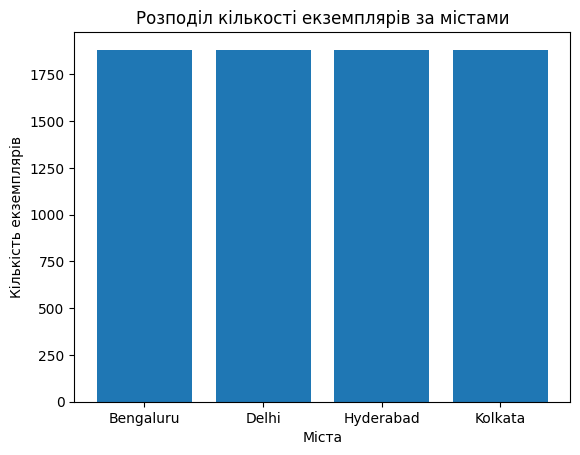

In [58]:
class_counts = y_res.value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Розподіл кількості екземплярів за містами')
plt.xlabel('Міста')
plt.ylabel('Кількість екземплярів')
plt.show()

In [61]:
x_temp = x_res.drop(['AQI'], axis=1)
y_temp = x_res['AQI']

In [62]:
x_train_s, x_test_s, y_train_s, y_test_s = tts(x_temp, y_temp, test_size=0.1, random_state=42)

In [63]:
rf.fit(x_train_s, y_train_s)

RandomForestRegressor(random_state=42)

In [66]:
y_pred_rf_s = rf.predict(x_test_s)

In [68]:
mse_rf_s = mean_squared_error(y_test_s, y_pred_rf_s)
mae_rf_s = mean_absolute_error(y_test_s, y_pred_rf_s)
r2_rf_s = r2_score(y_test_s, y_pred_rf_s)
msle_rf_s = mean_squared_log_error(y_test_s, y_pred_rf_s)
rmse_rf_s = mse_rf**0.5

print('MSE = ', mse_rf_s)
print('MAE = ', mae_rf_s)
print('r2 = ', r2_rf_s)
print('MSLE = ', msle_rf_s)
print('RMSE = ', rmse_rf_s)

MSE =  0.000869289824923124
MAE =  0.018107045154813567
r2 =  0.9636962442748863
MSLE =  0.0005137798684796354
RMSE =  0.030569822980431916


In [69]:
svr.fit(x_test_s, y_test_s)
y_pred_svr_s = svr.predict(x_test_s)

In [70]:
mse_svr_s = mean_squared_error(y_test_s, y_pred_svr_s)
mae_svr_s = mean_absolute_error(y_test_s, y_pred_svr_s)
r2_svr_s = r2_score(y_test_s, y_pred_svr_s)
msle_svr_s = mean_squared_log_error(y_test_s, y_pred_svr_s)
rmse_svr_s = mse_svr**0.5

print('MSE = ', mse_svr_s)
print('MAE = ', mae_svr_s)
print('r2 = ', r2_svr_s)
print('MSLE = ', msle_svr_s)
print('RMSE = ', rmse_svr_s)

MSE =  0.002687139383245123
MAE =  0.044745451499291614
r2 =  0.8877782196780104
MSLE =  0.001812718182468236
RMSE =  0.05145188606420602


In [71]:
cb.fit(x_train_s, y_train_s)
y_pred_cb_s = cb.predict(x_test_s)

Learning rate set to 0.055389
0:	learn: 0.1441856	total: 6.5ms	remaining: 6.5s
1:	learn: 0.1374809	total: 10.3ms	remaining: 5.12s
2:	learn: 0.1311614	total: 14.1ms	remaining: 4.67s
3:	learn: 0.1251576	total: 17.3ms	remaining: 4.32s
4:	learn: 0.1194331	total: 23.1ms	remaining: 4.61s
5:	learn: 0.1140992	total: 26.5ms	remaining: 4.39s
6:	learn: 0.1090910	total: 30.1ms	remaining: 4.27s
7:	learn: 0.1042620	total: 34.8ms	remaining: 4.32s
8:	learn: 0.0998080	total: 40.3ms	remaining: 4.43s
9:	learn: 0.0955966	total: 58ms	remaining: 5.75s
10:	learn: 0.0915632	total: 68.6ms	remaining: 6.17s
11:	learn: 0.0878798	total: 79.3ms	remaining: 6.53s
12:	learn: 0.0843647	total: 83.8ms	remaining: 6.36s
13:	learn: 0.0810522	total: 87.2ms	remaining: 6.14s
14:	learn: 0.0778982	total: 94ms	remaining: 6.17s
15:	learn: 0.0748707	total: 102ms	remaining: 6.26s
16:	learn: 0.0720675	total: 105ms	remaining: 6.08s
17:	learn: 0.0693332	total: 110ms	remaining: 6s
18:	learn: 0.0667930	total: 114ms	remaining: 5.89s
19:	l

In [72]:
mse_cb_s = mean_squared_error(y_test_s, y_pred_cb_s)
mae_cb_s = mean_absolute_error(y_test_s, y_pred_cb_s)
r2_cb_s = r2_score(y_test_s, y_pred_cb_s)
msle_cb_s = mean_squared_log_error(y_test_s, y_pred_cb_s)
rmse_cb_s = mse_cb**0.5

print('MSE = ', mse_cb_s)
print('MAE = ', mae_cb_s)
print('r2 = ', r2_cb_s)
print('MSLE = ', msle_cb_s)
print('RMSE = ', rmse_cb_s)

MSE =  0.0008413285613145865
MAE =  0.018511016920701527
r2 =  0.9648639778140424
MSLE =  0.00048302300327991113
RMSE =  0.00919490391949769
